![head.png](https://github.com/iwh-halle/FinancialDataAnalytics/blob/master/figures/head.jpg?raw=1)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

# Homework Assignment

You will need a Git/GitHub repository to submit your course deliverables. Consult [**slides.ipynb**](https://github.com/iwh-halle/FinancialDataAnalytics) for help with the tasks below! If you need further assistance, do not hesitate to open a Q&A at https://github.com/iwh-halle/FinancialDataAnalytics/discussions



## Part 1: Python basics

### Task:

1. Write a function that calculates the present value as

    $\text{PV}(C_t) = \frac{C_t}{(1+r)^t}$

2. Provide a docstring for the function.
3. Print the output for $C_{10} = 100$ and $r = 0.03$. Use string formatting to improve readability.

In [2]:
def present_value(C, r, t):
    """
    Calculates the present value of a cash flow.
    
    Args:
        C (float): Cash flow amount.
        r (float): Interest rate (as a decimal).
        t (int): Time period.
    
    Returns:
        float: Present value of the cash flow.
    """
    return C / ((1 + r) ** t)

# Define the variables
cash_flow = 100  # Cash flow amount
interest_rate = 0.03  # Interest rate (3%)
time_period = 10  # Time period

# Calculate present value
pv = present_value(cash_flow, interest_rate, time_period)

# Print the output with string formatting
print("Present Value for C{} = {:.2f} and r = {:.2f}: {:.2f}".format(time_period, cash_flow, interest_rate, pv))



Present Value for C10 = 100.00 and r = 0.03: 74.41


### Task:

Plot $\text{PV}(C_t) = \frac{C_t}{(1+r)^t}$, with $C_{10} = 100$, as a function of $r$ for the interval 0 to 25%.

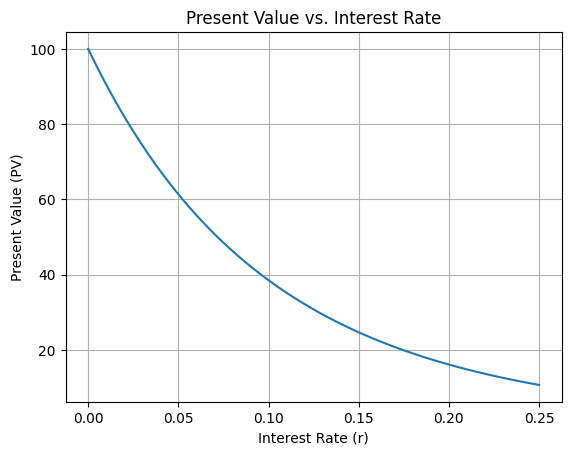

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
cash_flow = 100  # Cash flow amount
time_period = 10  # Time period

# Generate an array of interest rates from 0% to 25%
interest_rates = np.linspace(0, 0.25, 100)

# Calculate present value for each interest rate
present_values = [present_value(cash_flow, r, time_period) for r in interest_rates]

# Plot the present value as a function of interest rate
plt.plot(interest_rates, present_values)
plt.xlabel('Interest Rate (r)')
plt.ylabel('Present Value (PV)')
plt.title('Present Value vs. Interest Rate')
plt.grid(True)
plt.show()

### Task:

1. Use a loop to calculate the present value of $[10, 10, 110]$, these payments are made annually over the next three years. The interest rate is flat at $0.05$.
2. Print the discounted cash flow in a readable format.

In [4]:
# Define the cash flows and parameters
cash_flows = [10, 10, 110]  # Cash flow amounts
interest_rate = 0.05  # Interest rate (5%)
years = len(cash_flows)  # Number of years

# Initialize a list to store present values
present_values = []

# Calculate present value for each cash flow
for t, cash_flow in enumerate(cash_flows, start=1):
    pv = present_value(cash_flow, interest_rate, t)
    present_values.append(pv)

# Print the discounted cash flows in a readable format
for t, pv in enumerate(present_values, start=1):
    print(f"Year {t}: Discounted Cash Flow = {pv:.2f}")


Year 1: Discounted Cash Flow = 9.52
Year 2: Discounted Cash Flow = 9.07
Year 3: Discounted Cash Flow = 95.02


## Part 2: Working with data

In this assignment, you will work with financial data from a CSV file and use Python libraries such as NumPy, Pandas, Matplotlib and Seaborn to analyze and visualize the data. The data is stored in a file named 02_python_data.csv, which contains daily stock prices for various companies listed on Deutsche Börse (Xetra). The columns are labeled with Reuters identifier code (RIC). The first RIC '.GDAXI' is the german DAX index, the remaining RICs represent its constituents.

**Save all your visualizations as PNG files with "02_python_" as a prefix, e.g. "02_python_pricechart.png".**

In general, it is a useful practice to prefix output files with the name of the generating script.

### Task: 

1. Load the stock price data into a Pandas data frame called 'prices'.
2. Calculate both arithmetic as well as logarithmic returns for all assets. Store the return data in two separate data frames, named 'returns' and 'logreturns'. 
3. Display the first 5 rows of each data frame.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
prices = pd.read_csv('02_python_data.csv', index_col=0, parse_dates=True)
returns = prices.pct_change()
logreturns = np.log(prices) - np.log(prices.shift(1))

display(prices.head(5))
display(returns.head(5))
display(logreturns.head(5))


,.GDAXI,SAPG.DE,SIEGn.DE,DTEGn.DE,AIRG.DE,ALVG.DE,MBGn.DE,VOWG_p.DE,BMWG.DE,SHLG.DE,...,CONG.DE,HEIG.DE,MTXGn.DE,CBKG.DE,RHMG.DE,BNRGn.DE,ZALG.DE,QIA.DE,PSHG_p.DE,1COV.DE
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-29,14097.88,97.026932,117.78,17.570,105.50,216.20,67.10,148.94,78.51,51.26,...,66.02,55.26,193.65,6.282,214.8,73.94,37.83,44.04,79.54,41.29
2022-05-02,13939.07,95.982669,115.12,17.290,103.96,215.00,62.22,147.22,77.64,50.22,...,62.46,54.74,187.90,6.204,211.6,72.30,37.74,44.01,77.48,41.41
2022-05-03,14039.47,94.729554,114.56,17.376,106.44,217.00,62.88,150.20,79.98,50.42,...,64.32,55.22,197.10,6.412,222.4,72.18,38.07,44.06,79.58,39.40
2022-05-04,13970.82,92.979171,115.78,17.530,102.68,213.55,62.33,148.52,79.47,51.98,...,63.30,55.42,192.30,6.310,213.1,72.48,37.15,43.34,78.32,40.20
2022-05-05,13902.52,94.699718,116.58,17.592,108.96,199.76,61.00,147.18,78.03,53.06,...,60.54,54.18,189.95,6.188,211.0,71.34,33.21,44.05,77.78,38.75


,.GDAXI,SAPG.DE,SIEGn.DE,DTEGn.DE,AIRG.DE,ALVG.DE,MBGn.DE,VOWG_p.DE,BMWG.DE,SHLG.DE,...,CONG.DE,HEIG.DE,MTXGn.DE,CBKG.DE,RHMG.DE,BNRGn.DE,ZALG.DE,QIA.DE,PSHG_p.DE,1COV.DE
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-02,-0.011265,-0.010763,-0.022584,-0.015936,-0.014597,-0.005550,-0.072727,-0.011548,-0.011081,-0.020289,...,-0.053923,-0.009410,-0.029693,-0.012416,-0.014898,-0.022180,-0.002379,-0.000681,-0.025899,0.002906
2022-05-03,0.007203,-0.013056,-0.004864,0.004974,0.023855,0.009302,0.010608,0.020242,0.030139,0.003982,...,0.029779,0.008769,0.048962,0.033527,0.051040,-0.001660,0.008744,0.001136,0.027104,-0.048539
2022-05-04,-0.004890,-0.018478,0.010649,0.008863,-0.035325,-0.015899,-0.008747,-0.011185,-0.006377,0.030940,...,-0.015858,0.003622,-0.024353,-0.015908,-0.041817,0.004156,-0.024166,-0.016341,-0.015833,0.020305
2022-05-05,-0.004889,0.018505,0.006910,0.003537,0.061161,-0.064575,-0.021338,-0.009022,-0.018120,0.020777,...,-0.043602,-0.022375,-0.012220,-0.019334,-0.009855,-0.015728,-0.106057,0.016382,-0.006895,-0.036070


,.GDAXI,SAPG.DE,SIEGn.DE,DTEGn.DE,AIRG.DE,ALVG.DE,MBGn.DE,VOWG_p.DE,BMWG.DE,SHLG.DE,...,CONG.DE,HEIG.DE,MTXGn.DE,CBKG.DE,RHMG.DE,BNRGn.DE,ZALG.DE,QIA.DE,PSHG_p.DE,1COV.DE
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-02,-0.011329,-0.010821,-0.022843,-0.016065,-0.014705,-0.005566,-0.075508,-0.011615,-0.011143,-0.020497,...,-0.055431,-0.009455,-0.030142,-0.012494,-0.015010,-0.022430,-0.002382,-0.000681,-0.026240,0.002902
2022-05-03,0.007177,-0.013142,-0.004876,0.004962,0.023575,0.009259,0.010552,0.020040,0.029694,0.003975,...,0.029344,0.008731,0.047801,0.032977,0.049780,-0.001661,0.008706,0.001135,0.026743,-0.049757
2022-05-04,-0.004902,-0.018651,0.010593,0.008824,-0.035964,-0.016026,-0.008785,-0.011248,-0.006397,0.030471,...,-0.015985,0.003615,-0.024655,-0.016036,-0.042716,0.004148,-0.024463,-0.016476,-0.015960,0.020101
2022-05-05,-0.004901,0.018336,0.006886,0.003531,0.059363,-0.066754,-0.021569,-0.009063,-0.018286,0.020564,...,-0.044581,-0.022629,-0.012296,-0.019524,-0.009903,-0.015853,-0.112113,0.016249,-0.006919,-0.036736


### Task:

1. Plot a histogram of DAX returns.
2. Plot both the prices as well as the returns of the DAX in one plot (you need two y axis).

Hint: 
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

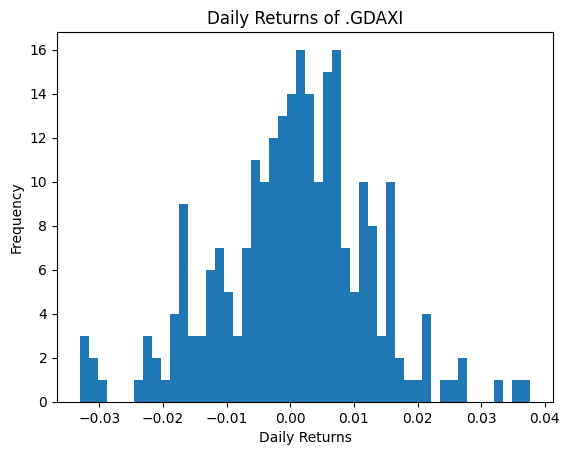

In [2]:
# Plot histogram of daily returns
plt.hist(returns['.GDAXI'], bins=50)
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.title('Daily Returns of .GDAXI')
plt.show()

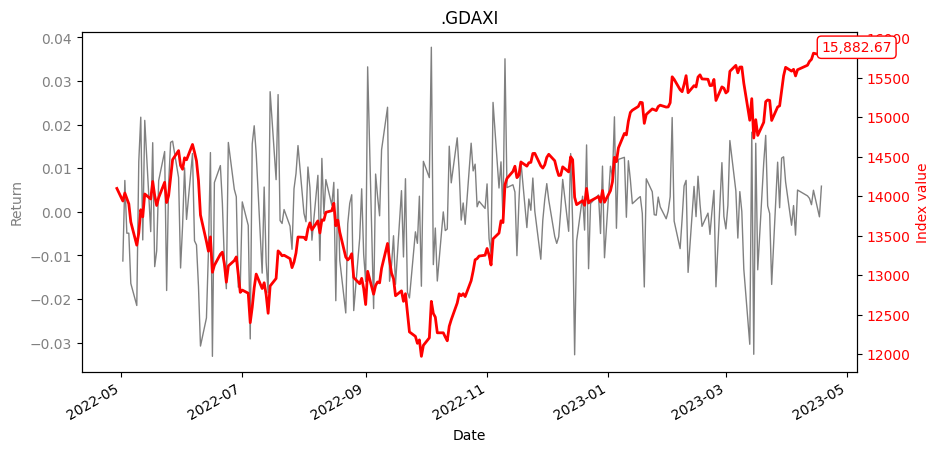

In [3]:
# create the figure and subplots
fig, ax1 = plt.subplots(figsize=(10,5))
# create a second y-axis
ax2 = ax1.twinx()

# plot the data on the first y-axis
returns['.GDAXI'].plot(ax=ax1, color='grey', linewidth=1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Return', color='grey')
ax1.tick_params(axis='y', labelcolor='grey')

# plot the data on the second y-axis
prices['.GDAXI'].plot(ax=ax2, color='red', linewidth=2)
ax2.set_ylabel('Index value', color='red')
ax2.tick_params(axis='y', labelcolor='red')
# Annotate (not asked)
ax2.text(prices['.GDAXI'].index[-1],  # x-axis coordinate
        prices['.GDAXI'][-1],  # y-axis coordinate
        f"{prices['.GDAXI'][-1]:,.2f}",  # text
        color='red',
        ha='left',  # horizontal alignment
        va='center',  # vertical alignment
        zorder=4,
        bbox=dict(facecolor='white', edgecolor='red', boxstyle='round')
        )

# set the title of the plot
plt.title('.GDAXI')

# show the plot
plt.show()

### Task:

Which company had the highest average stock return during the time period covered by the data?

In [4]:
max_logreturn = max(logreturns.mean())
logreturns.mean()[logreturns.mean() == max_logreturn]

CBKG.DE    0.001999
dtype: float64

### Task:

Plot a [heat map](https://en.wikipedia.org/wiki/Heat_map) of the [correlations](https://en.wikipedia.org/wiki/Correlation) between the arithmetic returns of the first 10 assets (i.e. first 10 columns).

Hint:
* `returns.iloc[:10,:10]` see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
* `returns.iloc[:10,:10].corr()` see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
* `sns.heatmap()` see https://seaborn.pydata.org/generated/seaborn.heatmap.html

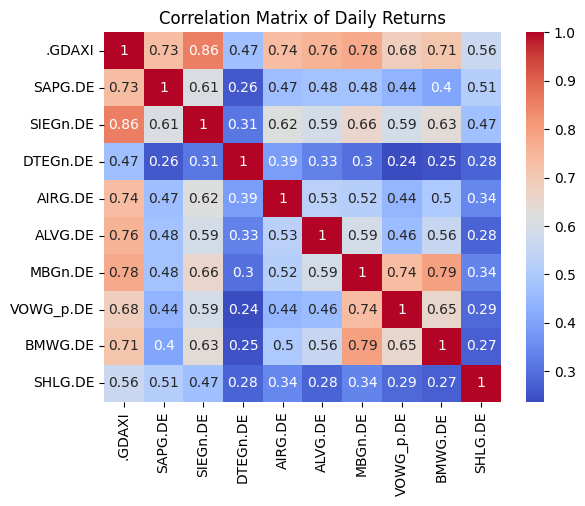

In [5]:
# Calculate correlation matrix of daily returns
correlation_matrix = returns.iloc[:,:10].corr()

# Plot heatmap of correlation matrix
import seaborn as sns
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix of Daily Returns')
plt.show()

### Task:

Considering all assets in the data, pick two pairs of stocks: 
1. the pair with the highest correlation and 
2. the pair with the lowest correlation. 
3. Create [scatter plots](https://en.wikipedia.org/wiki/Scatter_plot) for both pairs.

In [6]:
correlations = returns.corr()
correlations = correlations.unstack()
correlations = correlations.sort_values()
correlations = correlations[correlations != 1.0]
display(correlations.head(5))
display(correlations.tail(5))

CBKG.DE   QIA.DE     0.013872
QIA.DE    CBKG.DE    0.013872
          1COV.DE    0.018490
1COV.DE   QIA.DE     0.018490
BASFn.DE  QIA.DE     0.022001
dtype: float64

MUVGn.DE  HNRGn.DE    0.821825
BASFn.DE  1COV.DE     0.831465
1COV.DE   BASFn.DE    0.831465
SIEGn.DE  .GDAXI      0.856431
.GDAXI    SIEGn.DE    0.856431
dtype: float64

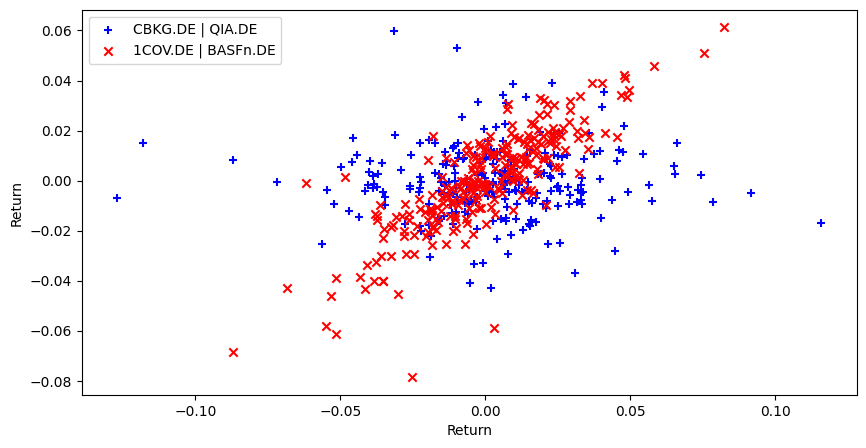

In [7]:
# create the figure and subplots
fig, ax1 = plt.subplots(figsize=(10,5))

# plot the data on the first y-axis
ax1.scatter(returns['CBKG.DE'], returns['QIA.DE'], color='blue', marker='+', label='CBKG.DE | QIA.DE')
ax1.scatter(returns['1COV.DE'], returns['BASFn.DE'], color='red', marker='x', label='1COV.DE | BASFn.DE')
ax1.set_xlabel('Return')
ax1.set_ylabel('Return')
ax1.legend(loc='upper left')

# show the plot
plt.show()

### Task:

1. Calculate the annualized [volatility](https://en.wikipedia.org/wiki/Volatility_(finance)) and [return](https://en.wikipedia.org/wiki/Rate_of_return) of each asset in the dataset. Assume there are 252 trading days in a year. (Use log-returns!)
2. Also calculate the [Sharpe ratio](https://en.wikipedia.org/wiki/Sharpe_ratio) for each asset, assuming a risk free rate of $0.5\%$ p.a..

In [8]:
annualized = pd.DataFrame(None)
annualized['return'] = logreturns.mean() * 252
annualized['volatility'] = logreturns.std() * np.sqrt(252)
annualized['sharpe'] = (annualized['return'] - 0.005) / annualized['volatility']
annualized.sort_values(by='sharpe', ascending=False, inplace=True)
display(annualized.head(5))

,return,volatility,sharpe
MUVGn.DE,0.374857,0.228483,1.618751
DTEGn.DE,0.248276,0.169142,1.438295
BEIG.DE,0.246532,0.191990,1.258040
HNKG_p.DE,0.209068,0.169956,1.200713
CBKG.DE,0.503846,0.470027,1.061314


### Task:

As you can see, we are using daily data so far. Re-sample the data to monthly frequency and plot monthly prices for 'BMWG.DE'.

Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

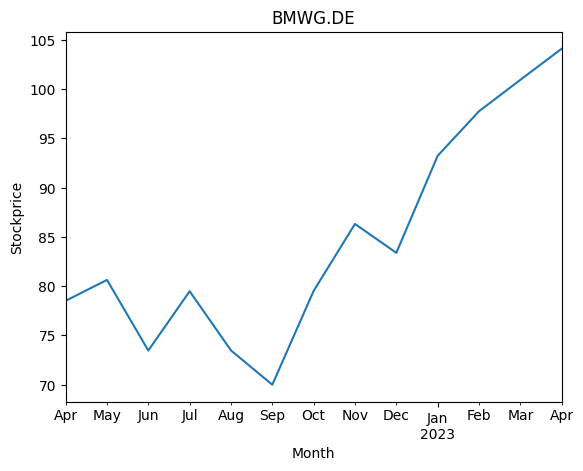

In [9]:
prices_monthly = prices.resample('M').last()
prices_monthly['BMWG.DE'].plot()
plt.title('BMWG.DE')
plt.xlabel('Month')
plt.ylabel('Stockprice')

plt.show()